In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style("whitegrid")

%config Completer.use_jedi = False

In [2]:
df = pd.read_csv("../Datasets/covid_19_cf.csv", low_memory=False)

In [3]:
df.head()

,test_date,cough,fever,sore_throat,shortness_of_breath,head_ache,corona_result,age_60_and_above,gender,test_indication
0,2020-04-30,0,0,0,0,0,negative,None,female,Other
1,2020-04-30,1,0,0,0,0,negative,None,female,Other
2,2020-04-30,0,1,0,0,0,negative,None,male,Other
3,2020-04-30,1,0,0,0,0,negative,None,female,Other
4,2020-04-30,1,0,0,0,0,negative,None,male,Other


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278848 entries, 0 to 278847
Data columns (total 10 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   test_date            278848 non-null  object
 1   cough                278848 non-null  object
 2   fever                278848 non-null  object
 3   sore_throat          278848 non-null  object
 4   shortness_of_breath  278848 non-null  object
 5   head_ache            278848 non-null  object
 6   corona_result        278848 non-null  object
 7   age_60_and_above     278848 non-null  object
 8   gender               278848 non-null  object
 9   test_indication      278848 non-null  object
dtypes: object(10)
memory usage: 21.3+ MB


In [5]:
df.isnull().sum()

test_date              0
cough                  0
fever                  0
sore_throat            0
shortness_of_breath    0
head_ache              0
corona_result          0
age_60_and_above       0
gender                 0
test_indication        0
dtype: int64

In [6]:
df['test_date'] = pd.to_datetime(df['test_date'])

In [7]:
df['test_date'].dt.month.value_counts()

4    211278
3     67570
Name: test_date, dtype: int64

In [8]:
df['test_date'].dt.year.value_counts()

2020    278848
Name: test_date, dtype: int64

In [9]:
df.drop("test_date", axis=1, inplace=True)

In [10]:
df.head()

,cough,fever,sore_throat,shortness_of_breath,head_ache,corona_result,age_60_and_above,gender,test_indication
0,0,0,0,0,0,negative,None,female,Other
1,1,0,0,0,0,negative,None,female,Other
2,0,1,0,0,0,negative,None,male,Other
3,1,0,0,0,0,negative,None,female,Other
4,1,0,0,0,0,negative,None,male,Other


<AxesSubplot:xlabel='corona_result', ylabel='count'>

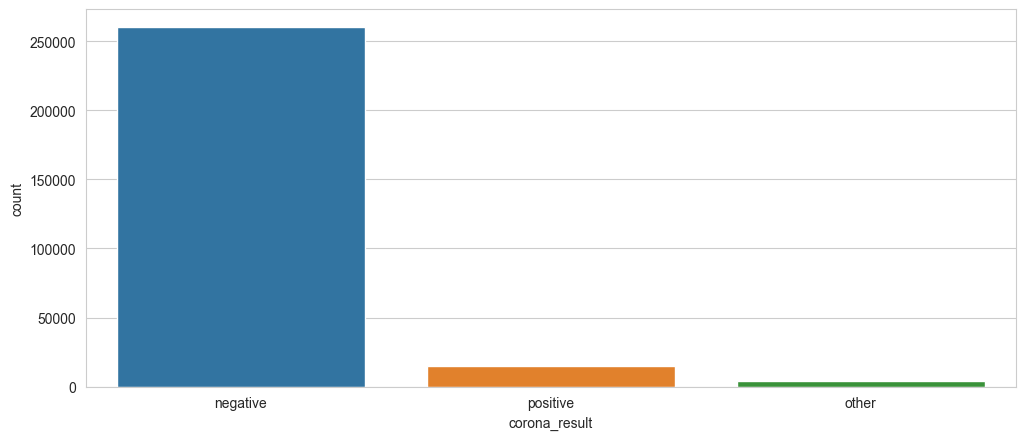

In [11]:
plt.figure(figsize=(12, 5), dpi=100);
sns.countplot(x=df['corona_result'])

In [12]:
def other_to_pos(x):
    if (x == "other") or (x == "positive"):
        return "positive"
    else:
        return "negative"

df['corona_result'] = df['corona_result'].apply(other_to_pos)

<AxesSubplot:xlabel='corona_result', ylabel='count'>

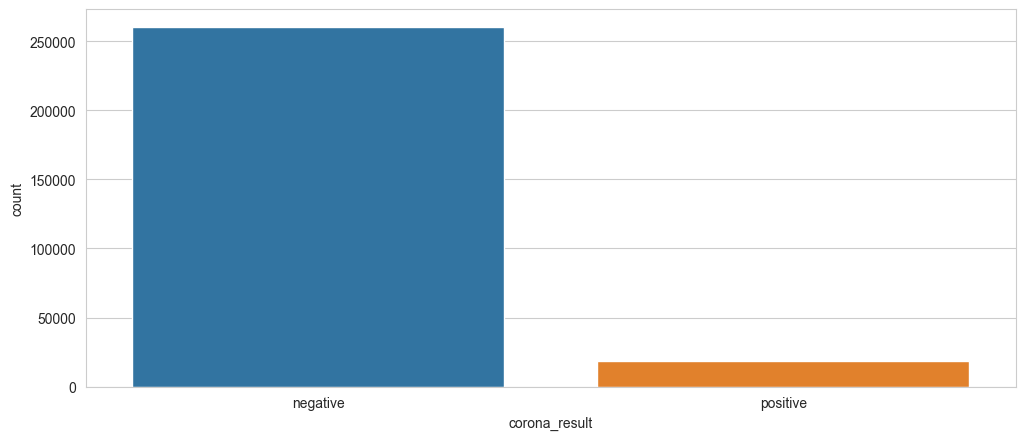

In [13]:
plt.figure(figsize=(12, 5), dpi=100);
sns.countplot(x=df['corona_result']) # Bad, but not worst

In [14]:
df['corona_result'] = df['corona_result'].apply(lambda x: 0 if x == "negative" else 1)

In [15]:
df['age_60_and_above'] = df['age_60_and_above'].apply(lambda x: 0 if (x == "None") or (x == "No") else 1)

In [16]:
df.head()

,cough,fever,sore_throat,shortness_of_breath,head_ache,corona_result,age_60_and_above,gender,test_indication
0,0,0,0,0,0,0,0,female,Other
1,1,0,0,0,0,0,0,female,Other
2,0,1,0,0,0,0,0,male,Other
3,1,0,0,0,0,0,0,female,Other
4,1,0,0,0,0,0,0,male,Other


In [17]:
df['gender'].value_counts()

female    130158
male      129127
None       19563
Name: gender, dtype: int64

In [18]:
df.dropna(inplace=True)

In [19]:
df['gender'] = df['gender'].apply(lambda x: 1 if x == "female" else 0)

In [20]:
df['gender'].value_counts()

0    148690
1    130158
Name: gender, dtype: int64

In [21]:
df.head()

,cough,fever,sore_throat,shortness_of_breath,head_ache,corona_result,age_60_and_above,gender,test_indication
0,0,0,0,0,0,0,0,1,Other
1,1,0,0,0,0,0,0,1,Other
2,0,1,0,0,0,0,0,0,Other
3,1,0,0,0,0,0,0,1,Other
4,1,0,0,0,0,0,0,0,Other


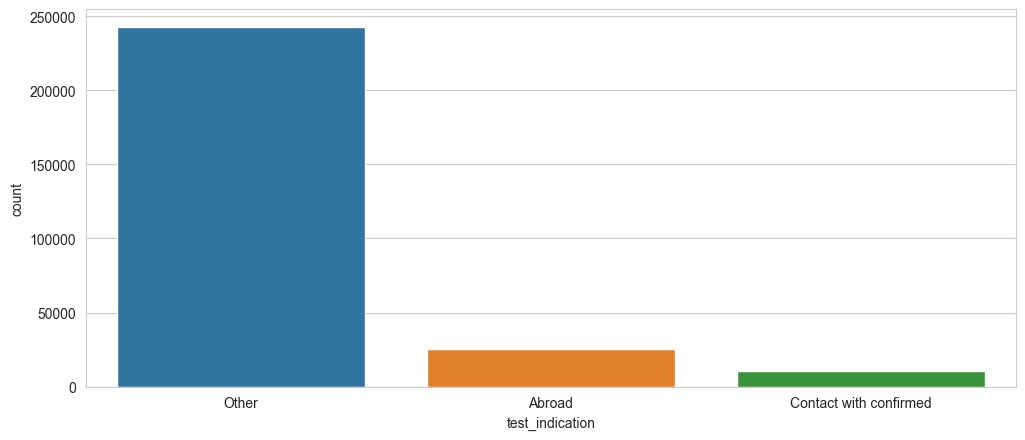

In [22]:
plt.figure(figsize=(12, 5), dpi=100);
sns.countplot(x=df['test_indication']);

In [23]:
def transform_test_indic(x):
    if x.lower() == "other":
        return "not_confirmed"
    elif x.lower() == "abroad":
        return "abroad"
    else:
        return "confirmed"

In [24]:
df['test_indication'] = df['test_indication'].apply(transform_test_indic)

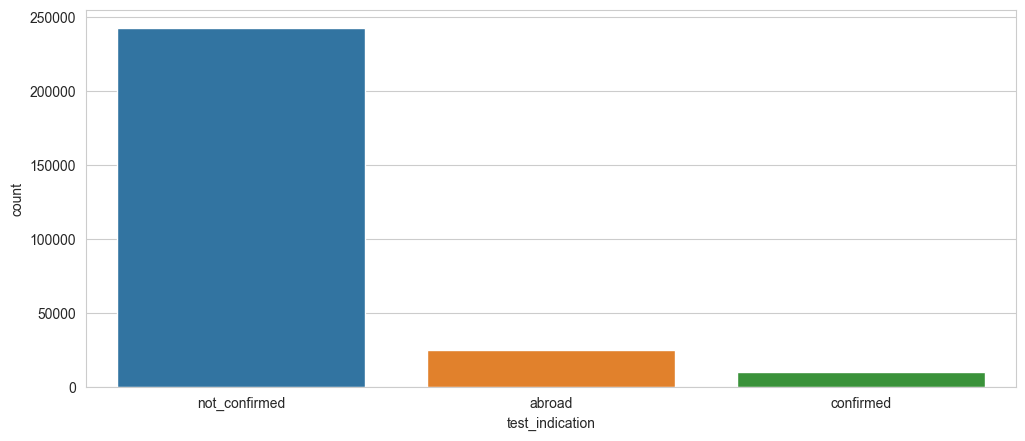

In [25]:
plt.figure(figsize=(12, 5), dpi=100);
sns.countplot(x=df['test_indication']);

In [26]:
pd.concat([df, pd.get_dummies(df['test_indication'])], axis=1)
df.drop("test_indication", axis=1, inplace=True)

In [27]:
df.corrwith(df["corona_result"]).sort_values(ascending=False)

corona_result       1.000000
age_60_and_above    0.043581
gender             -0.029766
dtype: float64

In [28]:
df.select_dtypes(include="object").columns

Index(['cough', 'fever', 'sore_throat', 'shortness_of_breath', 'head_ache'], dtype='object')

In [29]:
df['cough'] = df['cough'].apply(lambda x: 1 if x=="1" else 0)
df['fever'] = df['fever'].apply(lambda x: 1 if x=="1" else 0)
df['sore_throat'] = df['sore_throat'].apply(lambda x: 1 if x=="1" else 0)
df['shortness_of_breath'] = df['shortness_of_breath'].apply(lambda x: 1 if x=="1" else 0)
df['head_ache'] = df['head_ache'].apply(lambda x: 1 if x=="1" else 0)

In [30]:
df.select_dtypes(include="object").columns

Index([], dtype='object')

In [31]:
df.corrwith(df["corona_result"]).sort_values(ascending=False)

corona_result          1.000000
head_ache              0.326389
sore_throat            0.248279
fever                  0.240162
shortness_of_breath    0.208175
cough                  0.177171
age_60_and_above       0.043581
gender                -0.029766
dtype: float64

In [32]:
df.head()

,cough,fever,sore_throat,shortness_of_breath,head_ache,corona_result,age_60_and_above,gender
0,0,0,0,0,0,0,0,1
1,1,0,0,0,0,0,0,1
2,0,1,0,0,0,0,0,0
3,1,0,0,0,0,0,0,1
4,1,0,0,0,0,0,0,0


In [33]:
X, y = df.drop("corona_result", axis=1), df["corona_result"]

In [34]:
from sklearn.model_selection import train_test_split

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [36]:
from sklearn.preprocessing import StandardScaler

In [37]:
scaler = StandardScaler()

In [38]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [39]:
from sklearn.linear_model import LogisticRegression

In [40]:
model = LogisticRegression(verbose=2)

In [41]:
model.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s finished


LogisticRegression(verbose=2)

In [42]:
predictions = model.predict(X_test)

In [43]:
model.coef_

array([[ 0.22244549,  0.34638781,  0.24729455,  0.2002268 ,  0.41767639,
         0.15212855, -0.09182916]])

In [44]:
predictions

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [45]:
from sklearn.metrics import accuracy_score, recall_score, confusion_matrix, classification_report

In [46]:
accuracy_score(y_test, predictions)

0.9442232980694519

In [47]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97     78125
           1       0.86      0.19      0.31      5530

    accuracy                           0.94     83655
   macro avg       0.90      0.59      0.64     83655
weighted avg       0.94      0.94      0.93     83655



In [48]:
from joblib import dump

In [49]:
model = LogisticRegression()
model.fit(X, y)

LogisticRegression()

In [50]:
dump(scaler, "../Models/covid19_scaler.joblib")
dump(model, "../Models/covid19_model.joblib")

['../Models/covid19_model.joblib']